<a href="https://colab.research.google.com/github/thesimaranjaira/AspectExtraction_SentimentAnalysis/blob/main/Descriptive_statistics_NO2_rerun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
!pip install energyquantified


In [64]:
import pandas as pd
import numpy as np
from datetime import timedelta, date
from energyquantified import EnergyQuantified
from energyquantified.time import Frequency
from energyquantified.metadata import Aggregation
from datetime import datetime as dtdatetime
from energyquantified.time import (
   Resolution, Frequency, UTC, get_datetime
)
import matplotlib as mplt
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns

In [65]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [66]:
api_key = 'ea1244-4926fe-571bed-d0f4b5'
EQ = EnergyQuantified(api_key=api_key)

In [67]:
NO2_Spot = EQ.timeseries.load(
   'NO2 Price Spot EUR/MWh NordPool H Actual',
   begin='2015-01-01',
   end='2021-05-31',
   frequency=Frequency.PT1H
)
NO2_Spot = NO2_Spot.to_dataframe()
NO2_Spot

,NO2 Price Spot EUR/MWh NordPool H Actual
,
,
date,
2015-01-01 00:00:00+01:00,27.40
2015-01-01 01:00:00+01:00,27.07
2015-01-01 02:00:00+01:00,26.93
2015-01-01 03:00:00+01:00,26.83
2015-01-01 04:00:00+01:00,26.81
...,...
2021-05-30 19:00:00+02:00,48.72


In [68]:
NO2_Imb = EQ.timeseries.load(
   'NO2 Price Imbalance Consumption EUR/MWh H Actual',
   begin='2015-01-01',
   end='2021-05-31',
   frequency=Frequency.PT1H
)
NO2_Imb = NO2_Imb.to_dataframe()
NO2_Imb

,NO2 Price Imbalance Consumption EUR/MWh H Actual
,
,
date,
2015-01-01 00:00:00+01:00,21.36
2015-01-01 01:00:00+01:00,30.53
2015-01-01 02:00:00+01:00,30.53
2015-01-01 03:00:00+01:00,29.42
2015-01-01 04:00:00+01:00,28.86
...,...
2021-05-30 19:00:00+02:00,42.00


In [69]:
df_comb = pd.merge(NO2_Spot, NO2_Imb , left_index=True, right_index=True, how='inner')
df_comb

,NO2 Price Spot EUR/MWh NordPool H Actual,NO2 Price Imbalance Consumption EUR/MWh H Actual
,,
,,
date,,
2015-01-01 00:00:00+01:00,27.40,21.36
2015-01-01 01:00:00+01:00,27.07,30.53
2015-01-01 02:00:00+01:00,26.93,30.53
2015-01-01 03:00:00+01:00,26.83,29.42
2015-01-01 04:00:00+01:00,26.81,28.86
...,...,...
2021-05-30 19:00:00+02:00,48.72,42.00


In [70]:
df_comb.columns


MultiIndex([(        'NO2 Price Spot EUR/MWh NordPool H Actual', '', ''),
            ('NO2 Price Imbalance Consumption EUR/MWh H Actual', '', '')],
           )

In [71]:
df_comb['Direction', '', '']= df_comb['NO2 Price Spot EUR/MWh NordPool H Actual',''] - df_comb['NO2 Price Imbalance Consumption EUR/MWh H Actual','']

/usr/local/lib/python3.7/dist-packages/ipykernel/kernelbase.py:399: PerformanceWarning: indexing past lexsort depth may impact performance.
  user_expressions, allow_stdin)


In [72]:
df_comb.columns


MultiIndex([(        'NO2 Price Spot EUR/MWh NordPool H Actual', '', ''),
            ('NO2 Price Imbalance Consumption EUR/MWh H Actual', '', ''),
            (                                       'Direction', '', '')],
           )

In [73]:
df_comb

,NO2 Price Spot EUR/MWh NordPool H Actual,NO2 Price Imbalance Consumption EUR/MWh H Actual,Direction
,,,
,,,
date,,,
2015-01-01 00:00:00+01:00,27.40,21.36,6.04
2015-01-01 01:00:00+01:00,27.07,30.53,-3.46
2015-01-01 02:00:00+01:00,26.93,30.53,-3.60
2015-01-01 03:00:00+01:00,26.83,29.42,-2.59
2015-01-01 04:00:00+01:00,26.81,28.86,-2.05
...,...,...,...
2021-05-30 19:00:00+02:00,48.72,42.00,6.72


In [74]:
df_comb.drop(['NO2 Price Spot EUR/MWh NordPool H Actual', 'NO2 Price Imbalance Consumption EUR/MWh H Actual'], axis=1, level=0 ,inplace=True)
df_comb

,Direction
,
,
date,
2015-01-01 00:00:00+01:00,6.04
2015-01-01 01:00:00+01:00,-3.46
2015-01-01 02:00:00+01:00,-3.60
2015-01-01 03:00:00+01:00,-2.59
2015-01-01 04:00:00+01:00,-2.05
...,...
2021-05-30 19:00:00+02:00,6.72


In [75]:
df_comb.describe()

,Direction
,
,
count,56159.000000
mean,0.889453
std,7.940444
min,-351.930000
25%,-1.590000
50%,0.000000
75%,4.030000
max,84.530000


In [76]:
blue = sns.color_palette("muted", desat=0.9)[0]
green = sns.color_palette("muted", desat=0.9)[2]
red = sns.color_palette("muted", desat=0.9)[3]
grey = sns.color_palette("muted", desat=0.9)[7]

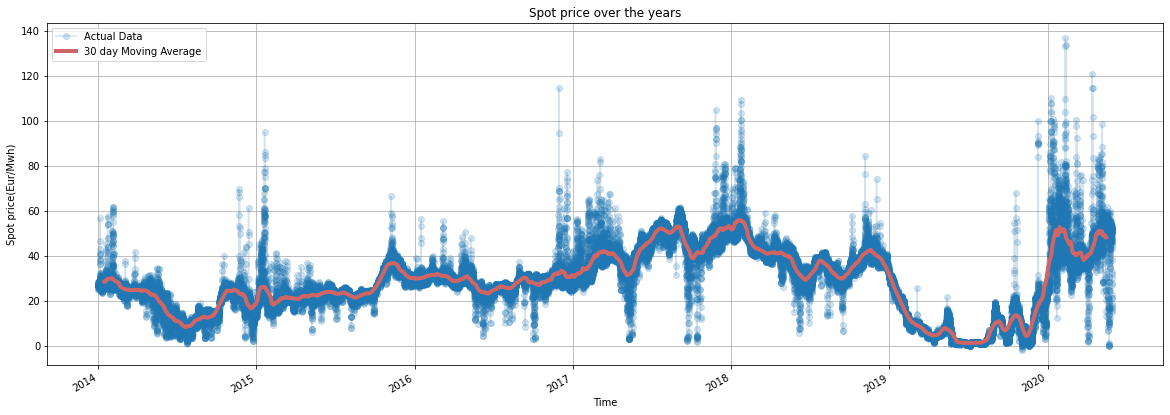

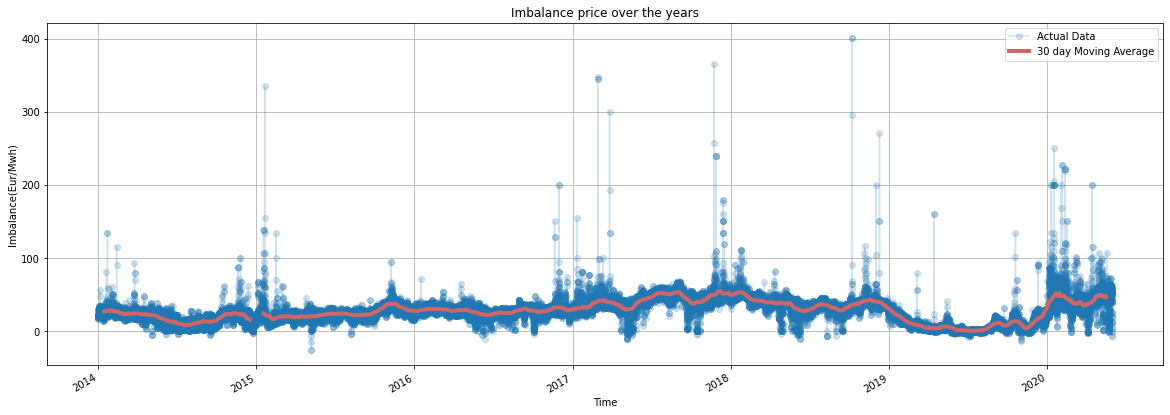

In [77]:
NO2_Spot.plot(figsize=[20,7], alpha=0.2, marker="o")
NO2_Spot.rolling(window=30*24, center=True).mean().plot(ax=plt.gca(), color=red, lw=4);
plt.legend(["Actual Data", "30 day Moving Average"])
plt.grid()
plt.xticks(), plt.yticks();
plt.xlabel("Time"), plt.ylabel("Spot price(Eur/Mwh)");
plt.title("Spot price over the years");

NO2_Imb.plot(figsize=[20,7], alpha=0.2, marker="o")
NO2_Imb.rolling(window=30*24, center=True).mean().plot(ax=plt.gca(), color=red, lw=4);
plt.legend(["Actual Data", "30 day Moving Average"])
plt.grid()
plt.xticks(), plt.yticks();
plt.xlabel("Time"), plt.ylabel("Imbalance(Eur/Mwh)");
plt.title("Imbalance price over the years");

In [78]:
NO2_Spot.describe()

,NO2 Price Spot EUR/MWh NordPool H Actual
,
,
count,56207.000000
mean,28.760421
std,14.439867
min,-1.730000
25%,20.720000
50%,28.260000
75%,38.520000
max,136.710000


In [79]:
NO2_Spot.drop(NO2_Spot.loc[NO2_Spot['NO2 Price Spot EUR/MWh NordPool H Actual']>100].index, inplace=True)

In [80]:
NO2_Imb.describe()

,NO2 Price Imbalance Consumption EUR/MWh H Actual
,
,
count,56159.000000
mean,27.882110
std,16.320345
min,-25.550000
25%,18.270000
50%,27.100000
75%,37.100000
max,400.490000


In [81]:
NO2_Imb.drop(NO2_Imb.loc[NO2_Imb['NO2 Price Imbalance Consumption EUR/MWh H Actual']>150].index, inplace=True)

In [82]:
def getSeason(ActualLoad):
  season=pd.Series()
  
  for year in ActualLoad.index.year.unique():

    yearlySeason = pd.Series("inter-season", index=ActualLoad.loc[str(year)].index)

    yearlySeason.loc[: "{}-2-27".format(year)] ="winter"
    yearlySeason.loc["{}-11-1".format(year):] = "winter"
    yearlySeason.loc["{}-5-1".format(year): "{}-9-30".format(year)]= "summer"

    season=pd.concat([season, yearlySeason])
  return season

In [83]:
season= getSeason(NO2_Spot).rename("season")
print(season)

2015-01-01 00:00:00+01:00    winter
2015-01-01 01:00:00+01:00    winter
2015-01-01 02:00:00+01:00    winter
2015-01-01 03:00:00+01:00    winter
2015-01-01 04:00:00+01:00    winter
                              ...  
2021-05-30 19:00:00+02:00    summer
2021-05-30 20:00:00+02:00    summer
2021-05-30 21:00:00+02:00    summer
2021-05-30 22:00:00+02:00    summer
2021-05-30 23:00:00+02:00    summer
Name: season, Length: 56184, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [84]:
def plot_daily(ActualLoad, seasonStr):
  xaxis= pd.date_range("2018-8-13", periods=24, freq="1h").strftime("%H:%M")
  fontsize = 15
  df= ActualLoad[season==seasonStr]
  df= df.assign(day_name = df.index.day_name(), hour= df.index.strftime("%H:%M"))

  weekdayName= ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

  (df.pivot_table("NO2 Price Spot EUR/MWh NordPool H Actual", index="day_name", columns= "hour")
    .T
    .loc[: , weekdayName]
    .plot(figsize=[8,5],
          lw=3));

  plt.xticks(np.arange(0, len(xaxis), 2), xaxis[::2]);
  plt.xlabel("Hour", fontsize=fontsize)
  plt.ylabel("NO2 Spot Eur/Mwh", fontsize=fontsize);
  plt.grid()
  plt.title("Mean Daily Profile- {}".format(seasonStr), fontsize=fontsize+5);
  plt.ylim(10,23)
  plt.autoscale()

In [85]:
def plot_season(x,y, xlabel, ylabel, title, freq, s=30):
  df= pd.concat([x,y],axis=1)

  seasons=["winter", "inter-season", "summer"]
  colors= {"winter":blue, "inter-season":grey, "summer":red}

  fig= plt.figure(figsize=[17,5])
  size=12
  alpha=0.5

  for i,seasonStr in enumerate(seasons):

    fig.add_subplot(1, 3, i+1)
    df[season==seasonStr].resample(freq).mean().plot.scatter(ax=plt.gca(), x= x.name, y=y.name, s=s, alpha=alpha, color=colors[seasonStr]);

    plt.grid()
    plt.xlabel(xlabel, size=size)
    plt.ylabel(ylabel, size=size)
    plt.title("{} - {}".format(seasonStr.capitalize(),title), size=size);
    plt.xticks(size=size, rotation=45), plt.yticks(size=size);
    plt.autoscale()
  plt.tight_layout()

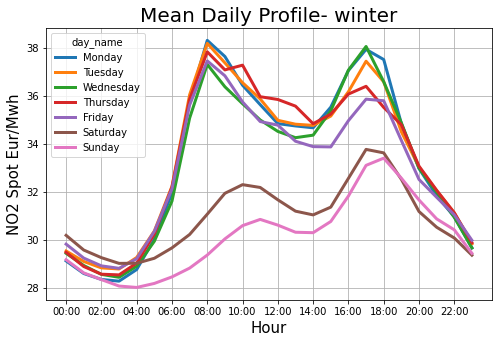

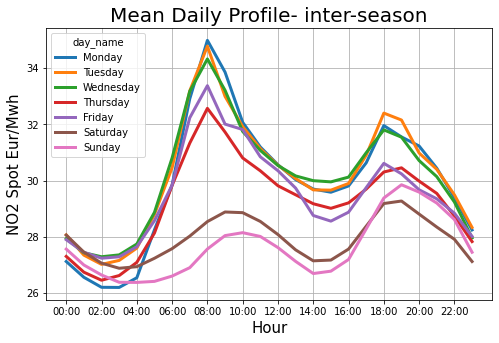

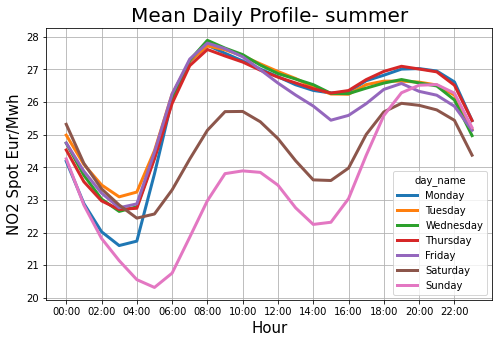

In [86]:
plot_daily(NO2_Spot, seasonStr="winter")
plot_daily(NO2_Spot, seasonStr="inter-season")
plot_daily(NO2_Spot, seasonStr="summer")

In [87]:
season_imb= getSeason(NO2_Imb).rename("season_imb")
print(season_imb)

2015-01-01 00:00:00+01:00    winter
2015-01-01 01:00:00+01:00    winter
2015-01-01 02:00:00+01:00    winter
2015-01-01 03:00:00+01:00    winter
2015-01-01 04:00:00+01:00    winter
                              ...  
2021-05-30 19:00:00+02:00    summer
2021-05-30 20:00:00+02:00    summer
2021-05-30 21:00:00+02:00    summer
2021-05-30 22:00:00+02:00    summer
2021-05-30 23:00:00+02:00    summer
Name: season_imb, Length: 56161, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [88]:
def plot_daily_Imb(ActualLoad, seasonStr):
  xaxis= pd.date_range("2018-8-13", periods=24, freq="1h").strftime("%H:%M")
  fontsize = 15
  df= ActualLoad[season_imb==seasonStr]
  df= df.assign(day_name = df.index.day_name(), hour= df.index.strftime("%H:%M"))

  weekdayName= ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

  (df.pivot_table("NO2 Price Imbalance Consumption EUR/MWh H Actual", index="day_name", columns= "hour")
    .T
    .loc[: , weekdayName]
    .plot(figsize=[8,5],
          lw=3));

  plt.xticks(np.arange(0, len(xaxis), 2), xaxis[::2]);
  plt.xlabel("Hour", fontsize=fontsize)
  plt.ylabel("NO2 Imbalance Eur/Mwh", fontsize=fontsize);
  plt.grid()
  plt.title("Mean Daily Profile- {}".format(seasonStr), fontsize=fontsize+5);
  plt.ylim(10,23)
  plt.autoscale()

In [89]:
def plot_season_Imb(x,y, xlabel, ylabel, title, freq, s=30):
  df= pd.concat([x,y],axis=1)

  seasons=["winter", "inter-season", "summer"]
  colors= {"winter":blue, "inter-season":grey, "summer":red}

  fig= plt.figure(figsize=[17,5])
  size=12
  alpha=0.5

  for i,seasonStr in enumerate(seasons):

    fig.add_subplot(1, 3, i+1)
    df[season_imb==seasonStr].resample(freq).mean().plot.scatter(ax=plt.gca(), x= x.name, y=y.name, s=s, alpha=alpha, color=colors[seasonStr]);

    plt.grid()
    plt.xlabel(xlabel, size=size)
    plt.ylabel(ylabel, size=size)
    plt.title("{} - {}".format(seasonStr.capitalize(),title), size=size);
    plt.xticks(size=size, rotation=45), plt.yticks(size=size);
    plt.autoscale()
  plt.tight_layout()

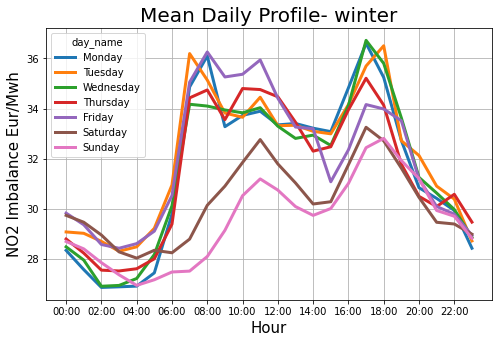

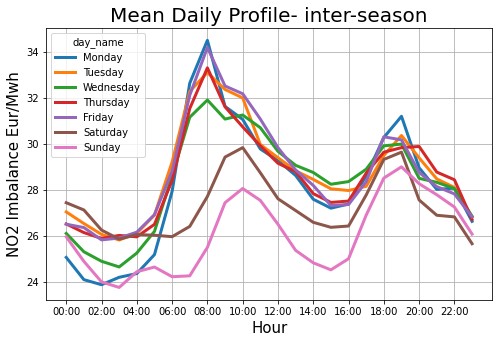

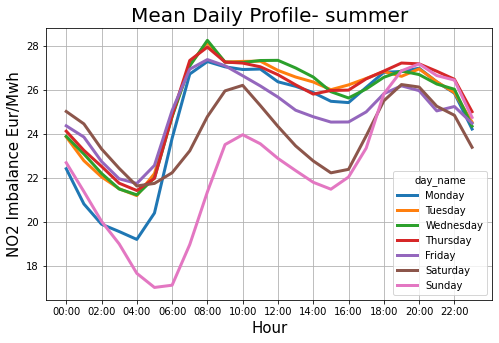

In [90]:
plot_daily_Imb(NO2_Imb, seasonStr="winter")
plot_daily_Imb(NO2_Imb, seasonStr="inter-season")
plot_daily_Imb(NO2_Imb, seasonStr="summer")

In [91]:
season_comb= getSeason(df_comb).rename("season_comb")
print(season_comb)

2015-01-01 00:00:00+01:00    winter
2015-01-01 01:00:00+01:00    winter
2015-01-01 02:00:00+01:00    winter
2015-01-01 03:00:00+01:00    winter
2015-01-01 04:00:00+01:00    winter
                              ...  
2021-05-30 19:00:00+02:00    summer
2021-05-30 20:00:00+02:00    summer
2021-05-30 21:00:00+02:00    summer
2021-05-30 22:00:00+02:00    summer
2021-05-30 23:00:00+02:00    summer
Name: season_comb, Length: 56207, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [95]:
def plot_daily_Comb(ActualLoad, seasonStr):
  xaxis= pd.date_range("2018-8-13", periods=24, freq="1h").strftime("%H:%M")
  fontsize = 15
  df= ActualLoad[season_comb==seasonStr]
  df= df.assign(day_name = df.index.day_name(), hour= df.index.strftime("%H:%M"))

  weekdayName= ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

  (df.pivot_table("Direction", index="day_name", columns= "hour")
    .T
    .loc[: , weekdayName]
    .plot(figsize=[8,5],
          lw=3));

  plt.xticks(np.arange(0, len(xaxis), 2), xaxis[::2]);
  plt.xlabel("Hour", fontsize=fontsize)
  plt.ylabel("Spread", fontsize=fontsize);
  plt.grid()
  plt.title("Mean Daily Profile- {}".format(seasonStr), fontsize=fontsize+5);
  plt.ylim(10,23)
  plt.autoscale()

In [96]:
def plot_season_Comb(x,y, xlabel, ylabel, title, freq, s=30):
  df= pd.concat([x,y],axis=1)

  seasons=["winter", "inter-season", "summer"]
  colors= {"winter":blue, "inter-season":grey, "summer":red}

  fig= plt.figure(figsize=[17,5])
  size=12
  alpha=0.5

  for i,seasonStr in enumerate(seasons):

    fig.add_subplot(1, 3, i+1)
    df[season_comb==seasonStr].resample(freq).mean().plot.scatter(ax=plt.gca(), x= x.name, y=y.name, s=s, alpha=alpha, color=colors[seasonStr]);

    plt.grid()
    plt.xlabel(xlabel, size=size)
    plt.ylabel(ylabel, size=size)
    plt.title("{} - {}".format(seasonStr.capitalize(),title), size=size);
    plt.xticks(size=size, rotation=45), plt.yticks(size=size);
    plt.autoscale()
  plt.tight_layout()

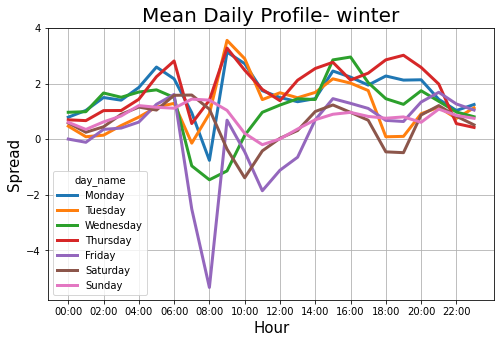

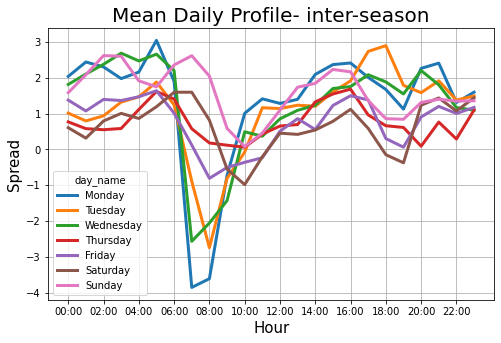

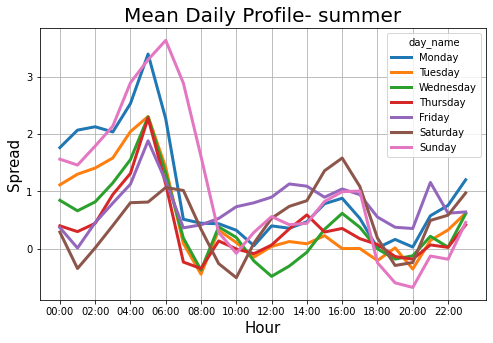

In [97]:
plot_daily_Comb(df_comb, seasonStr="winter")
plot_daily_Comb(df_comb, seasonStr="inter-season")
plot_daily_Comb(df_comb, seasonStr="summer")

In [98]:
NO2_Spot_2015 = EQ.timeseries.load(
   'NO2 Price Spot EUR/MWh NordPool H Actual',
   begin='2015-01-01',
   end='2015-12-31',
   frequency=Frequency.PT1H
)
NO2_Spot_2015 = NO2_Spot_2015.to_dataframe()
NO2_Spot_2015

,NO2 Price Spot EUR/MWh NordPool H Actual
,
,
date,
2015-01-01 00:00:00+01:00,27.40
2015-01-01 01:00:00+01:00,27.07
2015-01-01 02:00:00+01:00,26.93
2015-01-01 03:00:00+01:00,26.83
2015-01-01 04:00:00+01:00,26.81
...,...
2015-12-30 19:00:00+01:00,16.04


In [99]:
NO2_Spot_2020 = EQ.timeseries.load(
   'NO2 Price Spot EUR/MWh NordPool H Actual',
   begin='2020-01-01',
   end='2020-12-31',
   frequency=Frequency.PT1H
)
NO2_Spot_2020 = NO2_Spot_2020.to_dataframe()
NO2_Spot_2020

,NO2 Price Spot EUR/MWh NordPool H Actual
,
,
date,
2020-01-01 00:00:00+01:00,31.82
2020-01-01 01:00:00+01:00,31.77
2020-01-01 02:00:00+01:00,31.57
2020-01-01 03:00:00+01:00,31.28
2020-01-01 04:00:00+01:00,30.72
...,...
2020-12-30 19:00:00+01:00,24.70


In [100]:
NO2_Spot_2019 = EQ.timeseries.load(
   'NO2 Price Spot EUR/MWh NordPool H Actual',
   begin='2019-01-01',
   end='2019-12-31',
   frequency=Frequency.PT1H
)
NO2_Spot_2019 = NO2_Spot_2019.to_dataframe()
NO2_Spot_2019

,NO2 Price Spot EUR/MWh NordPool H Actual
,
,
date,
2019-01-01 00:00:00+01:00,48.77
2019-01-01 01:00:00+01:00,49.25
2019-01-01 02:00:00+01:00,49.17
2019-01-01 03:00:00+01:00,48.37
2019-01-01 04:00:00+01:00,47.19
...,...
2019-12-30 19:00:00+01:00,33.79


In [ ]:
# NO2_Spot_2018 = EQ.timeseries.load(
#    'NO2 Price Spot EUR/MWh NordPool H Actual',
#    begin='2018-01-01',
#    end='2018-12-31',
#    frequency=Frequency.PT1H
# )
# NO2_Spot_2018 = NO2_Spot_2018.to_dataframe()
# NO2_Spot_2018

In [ ]:
# NO2_Spot_2017 = EQ.timeseries.load(
#    'NO2 Price Spot EUR/MWh NordPool H Actual',
#    begin='2017-01-01',
#    end='2017-12-31',
#    frequency=Frequency.PT1H
# )
# NO2_Spot_2017 = NO2_Spot_2017.to_dataframe()
# NO2_Spot_2017

In [ ]:
# NO2_Spot_2016 = EQ.timeseries.load(
#    'NO2 Price Spot EUR/MWh NordPool H Actual',
#    begin='2016-01-01',
#    end='2016-12-31',
#    frequency=Frequency.PT1H
# )
# NO2_Spot_2016 = NO2_Spot_2016.to_dataframe()
# NO2_Spot_2016

In [101]:
mean_2015_spot = NO2_Spot_2015.mean()
mean_2020_spot = NO2_Spot_2020.mean()
change_percent = ((float(mean_2020_spot)-mean_2015_spot)/mean_2015_spot)*100
print(change_percent)

NO2 Price Spot EUR/MWh NordPool H Actual       -53.37817
dtype: float64


In [102]:
mean_2019_spot = NO2_Spot_2019.mean()
change_percent_2019 = ((float(mean_2019_spot)-mean_2015_spot)/mean_2015_spot)*100
print(change_percent_2019)

NO2 Price Spot EUR/MWh NordPool H Actual        98.042723
dtype: float64


In [ ]:
# mean_2018_spot = NO2_Spot_2018.mean()
# mean_2017_spot = NO2_Spot_2017.mean()
# mean_2016_spot = NO2_Spot_2016.mean()

In [ ]:
# change_percent_2018 = ((float(mean_2018_spot)-mean_2015_spot)/mean_2015_spot)*100
# print(change_percent_2018)
# change_percent_2017 = ((float(mean_2017_spot)-mean_2015_spot)/mean_2015_spot)*100
# print(change_percent_2017)
# change_percent_2016 = ((float(mean_2016_spot)-mean_2015_spot)/mean_2015_spot)*100
# print(change_percent_2016)

In [103]:
NO2_Imb_2015 = EQ.timeseries.load(
   'NO2 Price Imbalance Consumption EUR/MWh H Actual',
   begin='2015-01-01',
   end='2015-12-31',
   frequency=Frequency.PT1H
)
NO2_Imb_2015 = NO2_Imb_2015.to_dataframe()
NO2_Imb_2015

,NO2 Price Imbalance Consumption EUR/MWh H Actual
,
,
date,
2015-01-01 00:00:00+01:00,21.36
2015-01-01 01:00:00+01:00,30.53
2015-01-01 02:00:00+01:00,30.53
2015-01-01 03:00:00+01:00,29.42
2015-01-01 04:00:00+01:00,28.86
...,...
2015-12-30 19:00:00+01:00,12.30


In [104]:
NO2_Imb_2020 = EQ.timeseries.load(
   'NO2 Price Imbalance Consumption EUR/MWh H Actual',
   begin='2020-01-01',
   end='2020-12-31',
   frequency=Frequency.PT1H
)
NO2_Imb_2020 = NO2_Imb_2020.to_dataframe()
NO2_Imb_2020

,NO2 Price Imbalance Consumption EUR/MWh H Actual
,
,
date,
2020-01-01 00:00:00+01:00,34.00
2020-01-01 01:00:00+01:00,34.00
2020-01-01 02:00:00+01:00,34.00
2020-01-01 03:00:00+01:00,34.00
2020-01-01 04:00:00+01:00,26.00
...,...
2020-12-30 19:00:00+01:00,24.70


In [105]:
NO2_Imb_2019 = EQ.timeseries.load(
   'NO2 Price Imbalance Consumption EUR/MWh H Actual',
   begin='2019-01-01',
   end='2019-12-31',
   frequency=Frequency.PT1H
)
NO2_Imb_2019 = NO2_Imb_2019.to_dataframe()
NO2_Imb_2019

,NO2 Price Imbalance Consumption EUR/MWh H Actual
,
,
date,
2019-01-01 00:00:00+01:00,38.20
2019-01-01 01:00:00+01:00,40.21
2019-01-01 02:00:00+01:00,43.73
2019-01-01 03:00:00+01:00,42.22
2019-01-01 04:00:00+01:00,42.22
...,...
2019-12-30 19:00:00+01:00,23.00


In [106]:
mean_2015_imb = NO2_Imb_2015.mean()
mean_2020_imb = NO2_Imb_2020.mean()
change_percent_imb = ((float(mean_2020_imb)-mean_2015_imb)/mean_2015_imb)*100
print(change_percent_imb)

NO2 Price Imbalance Consumption EUR/MWh H Actual       -54.137706
dtype: float64


In [107]:
mean_2019_imb = NO2_Imb_2019.mean()
change_percent_imb_2019 = ((float(mean_2019_imb)-mean_2015_imb)/mean_2015_imb)*100
print(change_percent_imb_2019)

NO2 Price Imbalance Consumption EUR/MWh H Actual        98.681522
dtype: float64
